In [2]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from matplotlib import rcParams
from cmocean import cm
import oceansdb

In [3]:
pl.style.use('tableau-colorblind10')
%matplotlib inline

In [4]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 16

In [5]:
with open('./pickleJar/NOMAD_AOP&IOPs.pkl', 'rb') as f:
    d_aop = pickle.load(f)['d_aop']

In [6]:
d_aop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 38 columns):
id              4459 non-null object
datetime        4459 non-null datetime64[ns]
doy             4459 non-null float64
lat             4459 non-null float64
lon             4459 non-null float64
etopo2          4459 non-null float64
bathymetry      4459 non-null float64
oisst           4459 non-null float64
wtemp           1235 non-null float64
woa_sst_mean    2516 non-null float64
woa_sst_se      2516 non-null float64
sal             672 non-null float64
woa_sal_mean    2511 non-null float64
woa_sal_se      2511 non-null float64
rrs405          12 non-null float64
rrs411          4293 non-null float64
rrs443          4456 non-null float64
rrs455          393 non-null float64
rrs465          375 non-null float64
rrs489          4422 non-null float64
rrs510          3435 non-null float64
rrs520          1559 non-null float64
rrs530          1589 non-null float64
rrs550          91

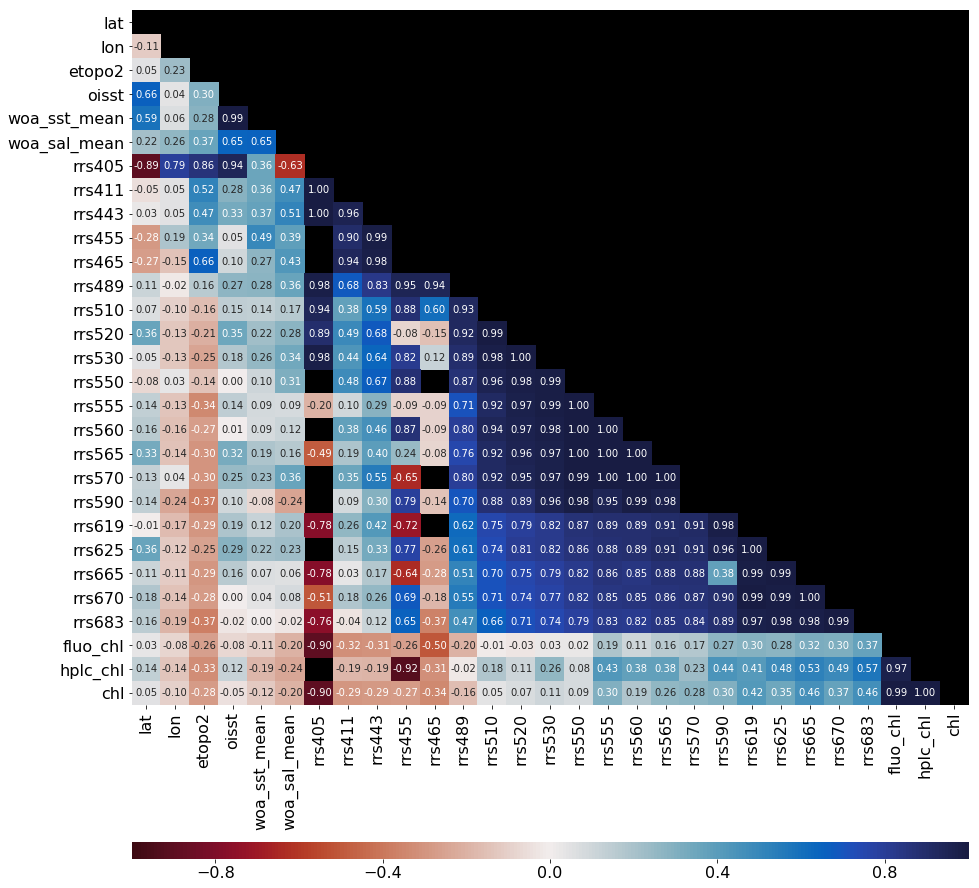

In [29]:
_, ax = pl.subplots(figsize=(15, 18))
ax.set_facecolor('k')
cols=['lat','lon','etopo2', 'oisst', 'woa_sst_mean', 'woa_sal_mean'] +\
        [col for col in d_aop.columns if 'rrs' in col] +\
        ['fluo_chl', 'hplc_chl', 'chl']
sb.heatmap(d_aop[cols].corr(), cmap=cm.balance_r, annot=True, vmin=-1, vmax=1,
           mask=np.triu(np.ones([len(cols)]*2)), ax=ax, fmt='.2f',
          cbar_kws={'aspect': 50, 'orientation': 'horizontal', 'pad': 0.14});

In [30]:
row = d_aop.iloc[0]

In [59]:
np.isnan(row.rrs665)

True

In [37]:
row[['id', 'rrs619', 'rrs625', 'rrs665', 'rrs670', '683']]

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


id              1565
rrs619           NaN
rrs625    0.00661863
rrs665           NaN
rrs670    0.00346456
683              NaN
Name: 0, dtype: object

In [66]:
def pairwise_fill(row, feature_1, feature_2):
    """simple pairwise imputation"""
    if np.isnan(row[feature_1]):
        return row[feature_2]
    else:
        return row[feature_1]

In [87]:
d_reds = d_aop[['id', 'rrs619', 'rrs625', 'rrs665', 'rrs670', 'rrs683']]
d_reds.insert(d_reds.shape[1], 'red', np.NaN)

In [ ]:
d_reds.plot()

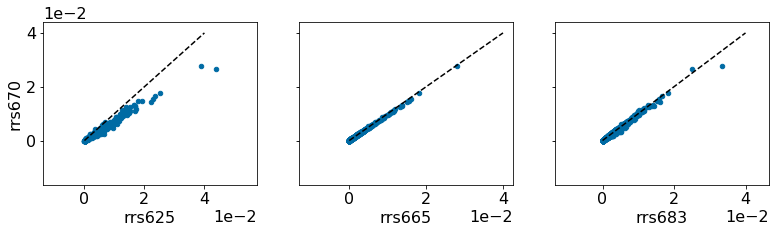

In [110]:
reds_ = ['rrs625', 'rrs665', 'rrs683']
lr = len(reds_)
f, axs = pl.subplots(ncols=lr, figsize=(4*lr+1, lr), sharey=True)
for ax, red in zip(axs.ravel(), reds_):
    d_reds[[red, 'rrs670']].dropna().plot(x=red, y='rrs670', kind='scatter', ax=ax)
    ax.plot([0, 4e-2], [0, 4e-2], 'k--')

## So, it seems safe to impute 665 and 683 to missing 670 values. I'll need a regression for 625, however.

In [88]:
d_reds[['red']] = d_reds.apply(pairwise_fill, axis=1, args=('rrs670', 'rrs665'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [89]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs619    883 non-null float64
rrs625    1884 non-null float64
rrs665    2641 non-null float64
rrs670    1598 non-null float64
rrs683    2008 non-null float64
red       3357 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


In [90]:
d_reds['red'] = d_reds.apply(pairwise_fill, axis=1, args=('red', 'rrs683'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs619    883 non-null float64
rrs625    1884 non-null float64
rrs665    2641 non-null float64
rrs670    1598 non-null float64
rrs683    2008 non-null float64
red       3365 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


In [92]:
d_reds['red'] = d_reds.apply(pairwise_fill, axis=1, args=('red', 'rrs625'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs619    883 non-null float64
rrs625    1884 non-null float64
rrs665    2641 non-null float64
rrs670    1598 non-null float64
rrs683    2008 non-null float64
red       3905 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


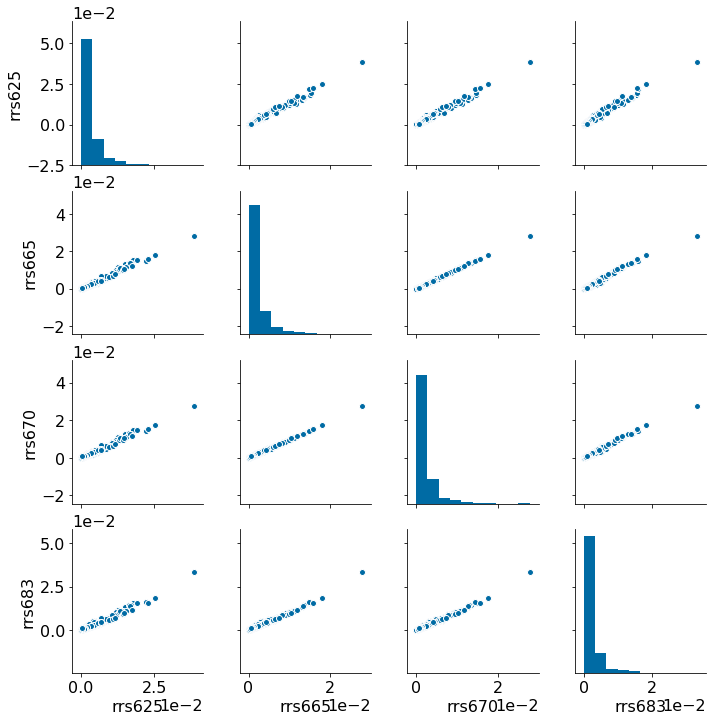